#Task 2 (Work with Dates)
you are working in metro station and your manager askes you get to him which day have more entries in the turnstiles this is turnstiles
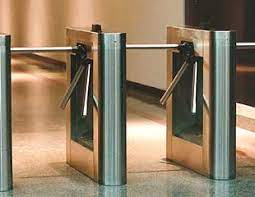

In [108]:
import pandas as pd
import numpy as np
import datetime

In [89]:
df = pd.read_csv('turnstile_220319.csv')

In [90]:
df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,03:00:00,REGULAR,7693605,2677444
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2022,07:00:00,REGULAR,7693608,2677454


In [91]:
df['DATE']=pd.to_datetime(df['DATE'])

In [92]:
df['DATE']

0        2022-03-12
1        2022-03-12
2        2022-03-12
3        2022-03-12
4        2022-03-12
            ...    
207551   2022-03-18
207552   2022-03-18
207553   2022-03-18
207554   2022-03-18
207555   2022-03-18
Name: DATE, Length: 207556, dtype: datetime64[ns]

In [96]:
df['TIME']

0         03:00:00
1         07:00:00
2         11:00:00
3         15:00:00
4         19:00:00
            ...   
207551    05:00:00
207552    09:00:00
207553    13:00:00
207554    17:00:00
207555    21:00:00
Name: TIME, Length: 207556, dtype: object

# as we see above the data time is object so we can`t extract imformation from it so we need first to creat a new column to combine data and time together and after that convert them to data time format to extract the name of day

In [1]:
# Take the date and time fields into a single datetime column


In [106]:
s_DATE=pd.to_datetime(df['DATE'],format='%d/%m/%Y')

s_DATE

0        2022-03-12
1        2022-03-12
2        2022-03-12
3        2022-03-12
4        2022-03-12
            ...    
207551   2022-03-18
207552   2022-03-18
207553   2022-03-18
207554   2022-03-18
207555   2022-03-18
Name: DATE, Length: 207556, dtype: datetime64[ns]

In [109]:
s_DATE + np.timedelta64(1, 'M')

0        2022-04-11 10:29:06
1        2022-04-11 10:29:06
2        2022-04-11 10:29:06
3        2022-04-11 10:29:06
4        2022-04-11 10:29:06
                 ...        
207551   2022-04-17 10:29:06
207552   2022-04-17 10:29:06
207553   2022-04-17 10:29:06
207554   2022-04-17 10:29:06
207555   2022-04-17 10:29:06
Name: DATE, Length: 207556, dtype: datetime64[ns]

# creat a new column to extract the name of day so to solve your task

In [93]:
df['name_of_day']=df['DATE'].dt.day_name()

In [94]:
df['name_of_day']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
            ...   
207551      Friday
207552      Friday
207553      Friday
207554      Friday
207555      Friday
Name: name_of_day, Length: 207556, dtype: object

# now it`s time to see the most day have the biggest number of entries

In [95]:
df.groupby('name_of_day').agg({
    'ENTRIES':'max'
})

,ENTRIES
name_of_day,
Friday,2147311677
Monday,2147313400
Saturday,2147313840
Sunday,2147313606
Thursday,2147312094
Tuesday,2147312988
Wednesday,2147312541
